In [98]:
# Classification Problem. Migraine Dataset https://www.kaggle.com/datasets/ranzeet013/migraine-dataset/data

# imports 
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler



In [99]:
# reading scv and viewing 5 first rows
df = pd.read_csv('migraine_data.csv')
df.head().T # as there are quite many features - let's transpose the data frame 

,0,1,2,3,4
Age,30,50,53,45,53
Duration,1,3,2,3,1
Frequency,5,5,1,5,1
Location,1,1,1,1,1
Character,1,1,1,1,1
Intensity,2,3,2,3,2
Nausea,1,1,1,1,1
Vomit,0,1,1,0,0
Phonophobia,1,1,1,1,1
Photophobia,1,1,1,1,1


In [100]:
# EDA. Define the structure of data (form, data types)

df.shape

# 400 rows and 24 columns 


(400, 24)

In [101]:
# EDA. Data quality (duplicates, missing values, anomalies)
#non-null values
df.info()

# 24 columns and only one is string - Type, 23 columns are numerical integer 64. 
# No missing values. Won't make additional analysis on missing values.  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [6]:
# EDA. Data quality
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,31.7050,12.139043,15.0,22.0,28.0,40.0,77.0
Duration,400.0,1.6100,0.770964,1.0,1.0,1.0,2.0,3.0
Frequency,400.0,2.3650,1.675947,1.0,1.0,2.0,4.0,8.0
Location,400.0,0.9725,0.268186,0.0,1.0,1.0,1.0,2.0
Character,400.0,0.9775,0.277825,0.0,1.0,1.0,1.0,2.0
Intensity,400.0,2.4700,0.768490,0.0,2.0,3.0,3.0,3.0
Nausea,400.0,0.9875,0.111242,0.0,1.0,1.0,1.0,1.0
Vomit,400.0,0.3225,0.468019,0.0,0.0,0.0,1.0,1.0
Phonophobia,400.0,0.9775,0.148489,0.0,1.0,1.0,1.0,1.0
Photophobia,400.0,0.9800,0.140175,0.0,1.0,1.0,1.0,1.0


In [102]:
# Check for duplicate rows
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows = df[duplicates]
print("Duplicate rows:")
print(duplicate_rows)

# As we do not have the patient ID, won't remove the similar rows as they can be identical in different patients.
# No outliers can be found as well. 


Number of duplicate rows: 6
Duplicate rows:
     Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
94    28         1          5         1          1          2       1      0   
118   28         1          5         1          1          2       1      0   
169   31         1          1         1          1          2       1      1   
200   50         1          1         1          1          3       1      0   
280   22         1          1         1          1          2       1      0   
281   35         1          1         1          1          3       1      0   

     Phonophobia  Photophobia  ...  Vertigo  Tinnitus  Hypoacusis  Diplopia  \
94             1            1  ...        0         0           0         0   
118            1            1  ...        0         0           0         0   
169            1            1  ...        0         0           0         0   
200            1            1  ...        0         0           0         0   


In [105]:
# Let's look at Type column values to prepare it for encoding.

unique_types = df['Type'].unique()
print("'Type' column values:", unique_types)

# 7 values in Type column 


'Type' column values: ['Typical aura with migraine' 'Migraine without aura' 'Basilar-type aura'
 'Sporadic hemiplegic migraine' 'Familial hemiplegic migraine' 'Other'
 'Typical aura without migraine']


In [106]:
df['Type'].value_counts()

Type
Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: count, dtype: int64

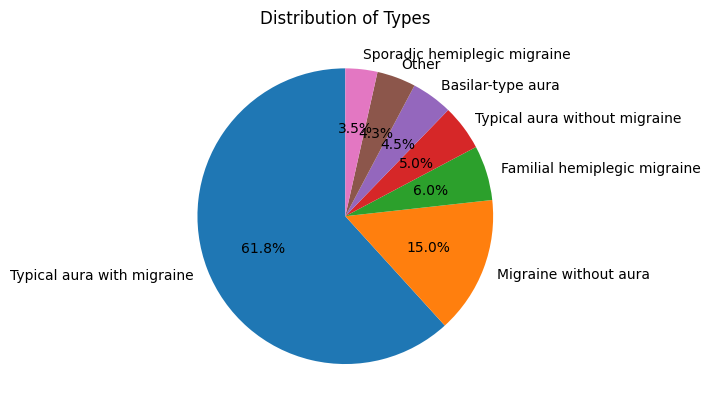

In [107]:
# Distribution of types are unbalanced.
type_counts = df['Type'].value_counts()

type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Прибираємо стандартний підпис осі y
plt.title('Distribution of Types')
plt.show()

In [108]:
# Let's encode the column 'Type', it has 7 nominal values, so will use the One-Hot Encoder(integer 1 or 0 ).
df_encoded = pd.get_dummies(df, columns=['Type'], dtype=int)
df_encoded.head().T




,0,1,2,3,4
Age,30,50,53,45,53
Duration,1,3,2,3,1
Frequency,5,5,1,5,1
Location,1,1,1,1,1
Character,1,1,1,1,1
Intensity,2,3,2,3,2
Nausea,1,1,1,1,1
Vomit,0,1,1,0,0
Phonophobia,1,1,1,1,1
Photophobia,1,1,1,1,1


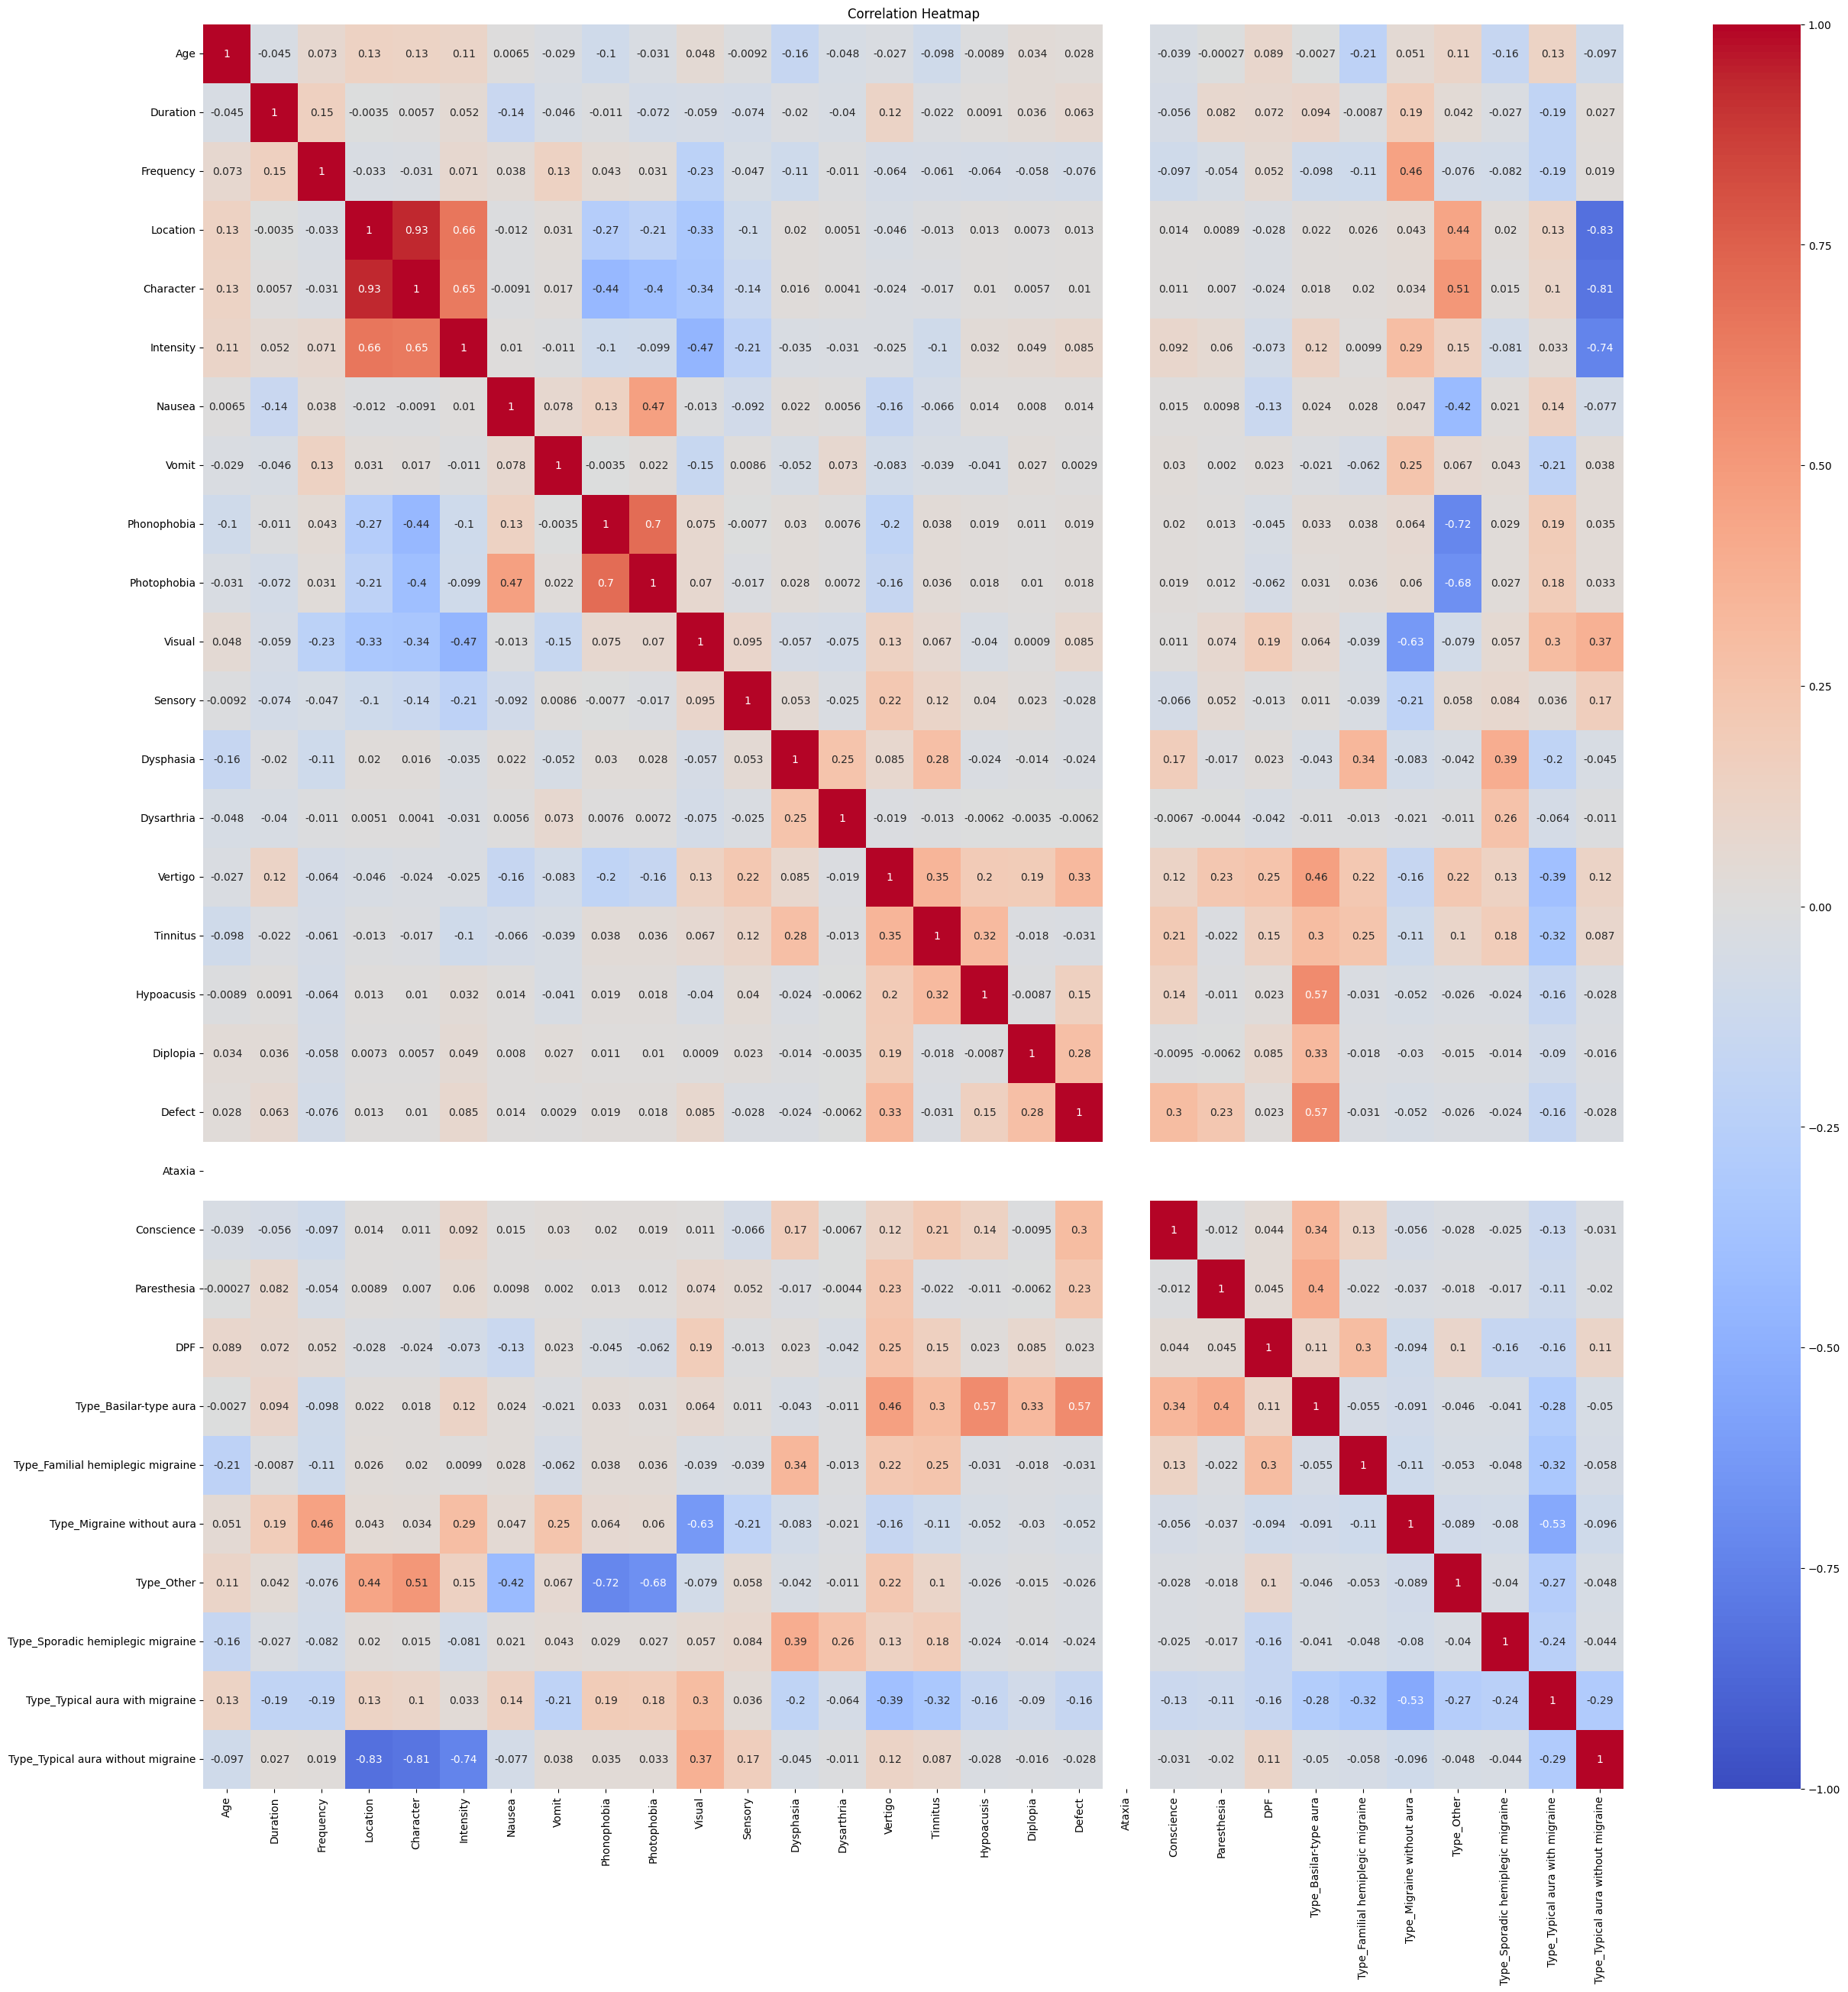

In [109]:
# data correlation 

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


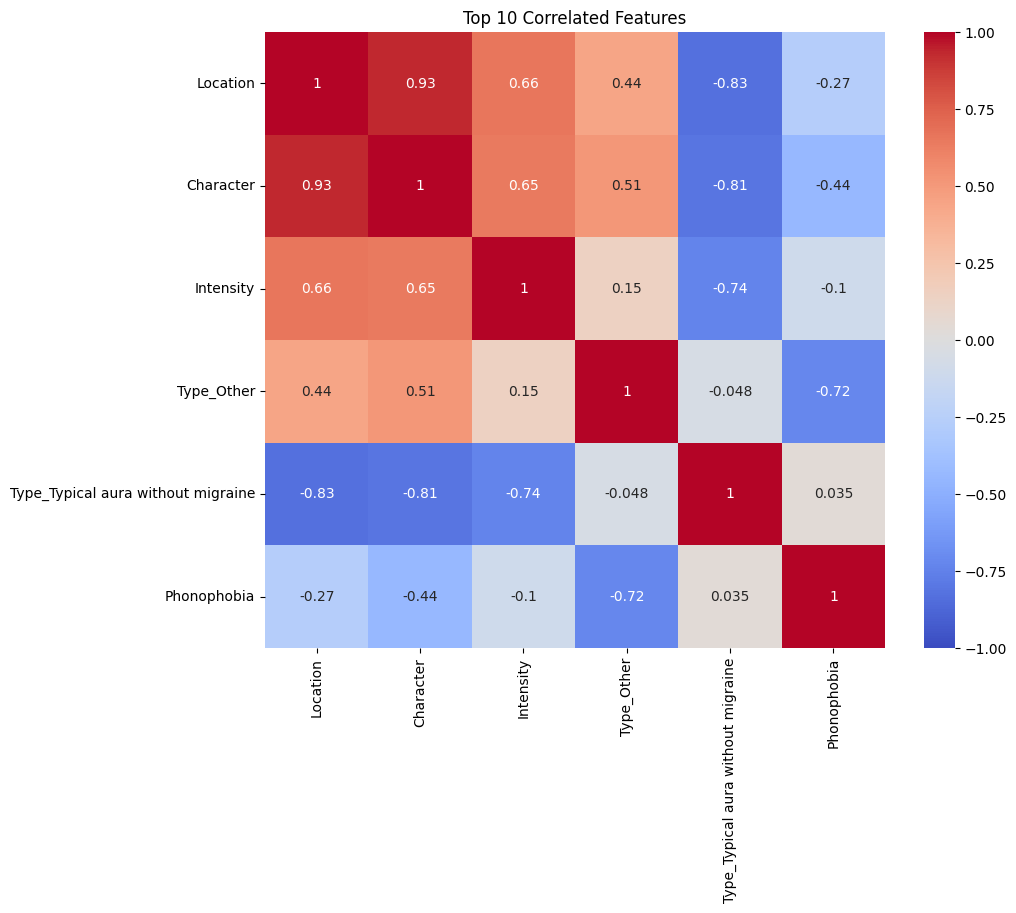

Top 10 Correlations:
Character                           Location                              0.933517
Location                            Character                             0.933517
Type_Typical aura without migraine  Location                              0.832954
Location                            Type_Typical aura without migraine    0.832954
Character                           Type_Typical aura without migraine    0.808188
Type_Typical aura without migraine  Character                             0.808188
                                    Intensity                             0.738288
Intensity                           Type_Typical aura without migraine    0.738288
Type_Other                          Phonophobia                           0.720125
Phonophobia                         Type_Other                            0.720125
dtype: float64


In [110]:
# Display the top 10 correlations
correlation_matrix = df_encoded.corr()

# Extract the top 10 correlations 
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1]  # Remove self-correlations
top_corr_pairs = corr_pairs.abs().sort_values(ascending=False).head(10)

# Create a heatmap for the top 10 correlations
top_corr_indices = top_corr_pairs.index.tolist()
top_corr_matrix = correlation_matrix.loc[
    list(set([i for i, j in top_corr_indices] + [j for i, j in top_corr_indices])),
    list(set([i for i, j in top_corr_indices] + [j for i, j in top_corr_indices]))
]

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Top 10 Correlated Features')
plt.show()

print("Top 10 Correlations:")
print(top_corr_pairs)

In [111]:
# As the classification model is needed for this dataset. Let's start with Random Forest model, feature scaling is unnecessary, but the data set has unbalanced classes and only 400 rows. 
# It can cause weak classes in the model. 

# Separate features (X) and target variables (y)
X = df_encoded.iloc[:, :23]  # First 23 columns are features
y = df_encoded.iloc[:, 23:]  # Last 7 columns are target variables

# Check the shape of X and y to ensure they are correct
print(X.shape)
print(y.shape)

# Split the data into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Further split the temporary set into validation (50% of 40%) and test (50% of 40%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the number of samples in each set
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Perform cross-validation on the training set
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Predictions
y_train_pred = best_rf.predict(X_train)
y_val_pred = best_rf.predict(X_val)
y_test_pred = best_rf.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Metrics for {dataset_name} dataset:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_true, y_pred, zero_division=0))
    print("\n")

# Evaluate on the training set
evaluate_model(y_train, y_train_pred, "training")
# Evaluate on the validation set
evaluate_model(y_val, y_val_pred, "validation")
# Evaluate on the test set
evaluate_model(y_test, y_test_pred, "test")

# Training//Validation//Test Performance: There's a great difference in performance metrics in three sets. 
# Classes 0, 1, 3, and 4 tend to have lower metrics (especially in recall) compared to other classes in the validation and test sets. It could be difficult to predict these classes.
# Here overfitting can be noticed. 


(400, 23)
(400, 7)
Training set size: 240
Validation set size: 80
Test set size: 80
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validation scores: [0.83333333 0.79166667 0.875      0.83333333 0.79166667]
Mean cross-validation score: 0.825
Metrics for training dataset:
Accuracy: 0.9792
Precision: 0.9799
Recall: 0.9792
F1 Score: 0.9781
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.79      0.88        14
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        11
           4       1.00      0.80      0.89        10
           5       0.97      1.00      0.98       146
           6       1.00      1.00      1.00        14

   micro avg       0.98      0.98      0.98       240
   macro avg       1.00      0.94      0.96       240
weighted avg       0.98      0.98      0.98       24

In [112]:
# Random Forest, training (70%) and test (30%) sets. Let's try to reduce the number of sets and exclude validational for making bigger sets for training and testing. Training set size: 280. Test set size: 120

# Separate features (X) and target variables (y)
X = df_encoded.iloc[:, :23]  # First 23 columns are features
y = df_encoded.iloc[:, 23:]  # Last 7 columns are target variables

# Check the shape of X and y to ensure they are correct
print(X.shape)
print(y.shape)

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the number of samples in each set
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Perform cross-validation on the training set
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Metrics for {dataset_name} dataset:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_true, y_pred, zero_division=0))
    print("\n")

# Evaluate on the training set
evaluate_model(y_train, y_train_pred, "training")
# Evaluate on the test set
evaluate_model(y_test, y_test_pred, "test")


# Random Forest Classifier, training (70%) and test (30%) sets. Training//Test Performance: 
# There is a large difference in performance metrics (accuracy, precision, recall, F1-score) 
# in the training set and the test set. It ccould be overfitting, where the model performs exceptionally well on the training set data but generalizes on test data.
# Classes 0, 1, 3, 4 show lower performance metrics in the test set, here can be hard correctly predicting these classes.
# Classes 2, 5, 6 show higher metrics, here prediction could work better.


(400, 23)
(400, 7)
Training set size: 280
Test set size: 120
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validation scores: [0.80357143 0.85714286 0.83928571 0.89285714 0.76785714]
Mean cross-validation score: 0.8321428571428571
Metrics for training dataset:
Accuracy: 0.9714
Precision: 0.9793
Recall: 0.9714
F1 Score: 0.9733
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.72      0.84        18
           2       1.00      1.00      1.00        41
           3       1.00      0.91      0.95        11
           4       1.00      0.82      0.90        11
           5       0.97      1.00      0.98       174
           6       1.00      1.00      1.00        15

   micro avg       0.98      0.97      0.97       280
   macro avg       1.00      0.92      0.95       280
weighted avg       0.98      0.97      0.97       280
 samples

In [86]:
# Logistic Regression model for multi-class classification, OneVsRestClassifier will handle multiple classes.
# Multi-class classification models for different types of migraine have been trained and evaluated successfully.
# The accuracy scores are high, mostly reaching 1.0 (100%0 - the models are making accurate predictions on both training and test data.
# Precision and recall scores are also high - the models are able to correctly classify both positive and negative instances for each type of migraine.
# F1 scores are high as well - a good balance between precision and recall.
# The cross-validation scores for each model shows good results. 

# Separate features (X) and target variables (y)
X = df_encoded.iloc[:, :23]  # Assuming first 23 columns are features
y = df_encoded.iloc[:, 23:]  # Assuming last 7 columns are target variables

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'estimator__C': [0.1, 1, 10, 100],
    'estimator__max_iter': [100, 200, 300]
}

# Define the evaluation function for multi-class classification
def evaluate_model(y_true, y_pred, dataset_name, target_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)  
    print(f"Metrics for {dataset_name} dataset - {target_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_true, y_pred, zero_division=0))
    print("\n")

# Loop through each target variable and train a model
for target_name in y.columns:
    print(f"Training model for target: {target_name}")

    # Extract the current target variable
    y_train_target = y_train[target_name]
    y_test_target = y_test[target_name]

    # Instantiate the LogisticRegression with OneVsRestClassifier
    log_reg = OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42))

    # Set up GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

    # Fit the model
    grid_search.fit(X_train_scaled, y_train_target)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print("Best hyperparameters:", best_params)

    # Extract actual hyperparameters
    best_params_log_reg = {key.split('__')[1]: value for key, value in best_params.items()}

    # Train the final model with the best hyperparameters
    best_log_reg = OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42, **best_params_log_reg))
    best_log_reg.fit(X_train_scaled, y_train_target)

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(best_log_reg, X_train_scaled, y_train_target, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print("Mean cross-validation score:", cv_scores.mean())

    # Predictions
    y_train_pred = best_log_reg.predict(X_train_scaled)
    y_test_pred = best_log_reg.predict(X_test_scaled)

    # Evaluate on the training set
    evaluate_model(y_train_target, y_train_pred, "training", target_name)
    # Evaluate on the test set
    evaluate_model(y_test_target, y_test_pred, "test", target_name)

   
# Logistic regression model showed great results, achieved high accuracy, precision, recall, F1 scores.
# The balance between training and test datasets, indicated good generalization.
# These results showed that logistic regression, with the chosen hyperparameters, is effective for classifying different types of migraine.


Training model for target: Type_Basilar-type aura
Best hyperparameters: {'estimator__C': 10, 'estimator__max_iter': 100}
Cross-validation scores: [1.       0.984375 0.96875  1.       0.984375]
Mean cross-validation score: 0.9875
Metrics for training dataset - Type_Basilar-type aura:
Accuracy: 0.9969
Precision: 0.9969
Recall: 0.9969
F1 Score: 0.9968
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       308
           1       1.00      0.92      0.96        12

    accuracy                           1.00       320
   macro avg       1.00      0.96      0.98       320
weighted avg       1.00      1.00      1.00       320



Metrics for test dataset - Type_Basilar-type aura:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00         6

    accuracy                          

In [96]:
# Save the model and scaler. 

from joblib import dump

# Save the model to a file
model_filename = 'migraine_classification_model.joblib'
dump(best_log_reg, model_filename)

# Save the scaler
scaler_filename = 'standard_scaler.joblib'
dump(scaler, scaler_filename)



['standard_scaler.joblib']

In [94]:
# Let's check how the model makes the predictions. 

from joblib import load
import warnings

# Load the saved model and scaler
loaded_model = load('migraine_classification_model.joblib')
loaded_scaler = load('standard_scaler.joblib')

# Example input data
input_data_1 = np.array([22, 2, 3, 0, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]).reshape(1, -1)
input_data_2 = np.array([35, 1, 3, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]).reshape(1, -1)

# Scale the input data using the same scaler (assuming 'scaler' is your StandardScaler object)
input_data_scaled_1 = scaler.transform(input_data_1)
input_data_scaled_2 = scaler.transform(input_data_2)

# Predict classes for each example
predicted_classes_1 = loaded_model.predict(input_data_scaled_1)
predicted_classes_2 = loaded_model.predict(input_data_scaled_2)

print(f"Example 1 - Predicted classes: {predicted_classes_1}")
print(f"Example 2 - Predicted classes: {predicted_classes_2}")

warnings.filterwarnings('ignore', message='X does not have valid feature names')



Example 1 - Predicted classes: [0]
Example 2 - Predicted classes: [1]
